### `Introduction`

Video games have come a long way since the creation of Pong in 1972. Over the course of 50 years, video games have grown into a \\$184.4 billion dollar industry (Arora, 2023). It has far outgrown both the music and movie industry (\\$26.2 billion and \\$26 billion respectively). Such a lucrative market attracts a great amount of aspiring game developers, but many have trouble deciding whether to join an established company or try their luck with a small, indie studio. \
\
We hope this data story serves to decrease the difficulty of this question. To this end, we are going to explore the difference between AAA games, meaning ‘developed by a large company’, and indie games. This is done by comparing their price, sales numbers, player counts and review scores.


In [1]:
# Import packages
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
# import warnings
# warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np

### `Dataset & preprocessing`

We have chosen a variety of datasets to include a lot of variables. We mainly use `steam_reviews_revenue.csv` which is a modified version of the [steam](https://www.kaggle.com/datasets/nikdavis/steam-store-games) dataset. Steam is the most used game launcher for PC's and desktops. We modified this dataset with a few extra variables such as is_aaa, Estimated Revenue and review_ratio. We've created a list containing the biggest videogame publishers: if a game's publishers is in this list, that entry's is_aaa is set to 1. Otherwise its value is 0. Estimated Revenue, along with the Launch Price variable, was taken from the [Steam Trends 2023](https://docs.google.com/spreadsheets/d/1D5MErWbFJ2Gsde9QxJ_HNMltKfF6fHCYdv4OQpXdnZ4/edit?gid=1714749788#gid=1714749788) dataset. They were merged with the steam dataset on the game's name. For review_ratio, we first calculated the total number of reviews for a game (positive_ratings + negative_ratings). The amount of positive reviews is then devided by total reviews. \
Other datasets used: \
`player_count.csv`: [this dataset](https://www.kaggle.com/datasets/faisaljanjua0555/most-played-games-of-all-time) contains various playercount stats, including all time peak. \
`result.csv`: [this dataset](https://www.kaggle.com/datasets/destring/metacritic-reviewed-games-since-2000) contains metascores (0-100) of various games. These come from Metacritic, which is a highly trusted game review website. \
`vgsales.csv`: [this dataset](https://www.kaggle.com/datasets/gregorut/videogamesales) contains the revenue of a large selection of console games that sold over 100000 copies. \
These datasets were all merged with the [steam](https://www.kaggle.com/datasets/nikdavis/steam-store-games) dataset on name.


### Price compared to amount of players


First of all we want to discover what the correlation between the price of a game and the amount of players that play the game is. Furthermore we want to explore the difference between AAA-games and Indie-games. To do so we have used the [steam_reviews_revenue.csv](https://www.kaggle.com/datasets/nikdavis/steam-store-games) combined with the [player_count.csv](https://www.kaggle.com/datasets/faisaljanjua0555/most-played-games-of-all-time) dataset. In the first dataset "current" indicates the amount of players a game has right now, "24th peak" the amount of players a game had on it's 24th peak and "all time peak" the highest amount of players a game has ever had. To emphasize the difference between AAA-games and Indie-games, we have split the data into those two categories. These categories are again split into two subdivisons depended on the price of a game. The length of the bar is depended on the avarage amount of players over the games in the according category.


In [2]:
df1 = pd.read_csv('DATASETS/aaa_published_games.csv')
df1 = df1[['name', 'price']]
df2 = pd.read_csv('DATASETS/indie_published_games.csv')
df2 = df2[['name', 'price']]
df3 = pd.read_csv('DATASETS/player_count.csv')
df1 = df1.merge(df3, how='inner', on='name')
df2 = df2.merge(df3, how='inner', on='name')
df1['Type of game']='AAA'
df2['Type of game']='Indie'
df = df1.merge(df2, how='outer')
df = df.drop(columns=['Unnamed: 5'])

AAA = df[df["Type of game"]=='AAA']
AAA.loc[:, 'Current'] = pd.to_numeric(AAA['Current'], errors='coerce')
AAA.loc[:, '24th Peak'] = pd.to_numeric(AAA['24th Peak'], errors='coerce')
AAA.loc[:, 'All_time peak'] = pd.to_numeric(AAA['All_time peak'], errors='coerce')

# AAA_price_categories = pd.qcut(AAA["price"], 3, labels=["Low", "Medium", "High"])
AAA['price_category'] = pd.qcut(AAA.loc[:, "price"], 2, labels=["Low", "High"])

AAA_low = AAA[AAA["price_category"]=="Low"]
AAA_current_low = AAA_low['Current'].mean() 
AAA_24th_low = AAA_low['24th Peak'].mean()
AAA_all_time_low = AAA_low['All_time peak'].mean()

# AAA_medium = AAA[AAA["price_category"]=="Medium"]
# AAA_current_medium = AAA_medium['Current'].mean() 
# AAA_24th_medium = AAA_medium['24th Peak'].mean()
# AAA_all_time_medium = AAA_medium['All_time peak'].mean()

AAA_high = AAA[AAA["price_category"]=="High"]
AAA_current_high = AAA_high['Current'].mean() 
AAA_24th_high = AAA_high['24th Peak'].mean()
AAA_all_time_high = AAA_high['All_time peak'].mean()

Indie = df[df["Type of game"]=='Indie']
Indie.loc[:, 'Current'] = pd.to_numeric(Indie['Current'], errors='coerce')
Indie.loc[:, '24th Peak'] = pd.to_numeric(Indie['24th Peak'], errors='coerce')
Indie.loc[:, 'All_time peak'] = pd.to_numeric(Indie['All_time peak'], errors='coerce')

# Indie_price_categories = pd.qcut(Indie["price"], 3, labels=["Low", "Medium", "High"])
Indie_price_categories = pd.qcut(Indie["price"], 2, labels=["Low", "High"])

Indie['price_category'] = Indie_price_categories

Indie_low = Indie[Indie["price_category"]=="Low"]
Indie_current_low = Indie_low['Current'].mean() 
Indie_24th_low = Indie_low['24th Peak'].mean()
Indie_all_time_low = Indie_low['All_time peak'].mean()

# Indie_medium = Indie[Indie["price_category"]=="Medium"]
# Indie_current_medium = Indie_medium['Current'].mean() 
# Indie_24th_medium = Indie_medium['24th Peak'].mean()
# Indie_all_time_medium = Indie_medium['All_time peak'].mean()

Indie_high = Indie[Indie["price_category"]=="High"]
Indie_current_high = Indie_high['Current'].mean() 
Indie_24th_high = Indie_high['24th Peak'].mean()
Indie_all_time_high = Indie_high['All_time peak'].mean()

# data = [['AAA low price', AAA_current_low, AAA_24th_low, AAA_all_time_low], ['AAA medium price', AAA_current_medium, AAA_24th_medium, AAA_all_time_medium], ['AAA high price', AAA_current_high, AAA_24th_high, AAA_all_time_high], ['Indie low price', Indie_current_low, Indie_24th_low, Indie_all_time_low], ['Indie medium price', Indie_current_medium, Indie_24th_medium, Indie_all_time_medium], ['Indie high price', Indie_current_high, Indie_24th_high, Indie_all_time_high]]
data = [['AAA low price', AAA_current_low, AAA_24th_low, AAA_all_time_low], ['AAA high price', AAA_current_high, AAA_24th_high, AAA_all_time_high], ['Indie low price', Indie_current_low, Indie_24th_low, Indie_all_time_low], ['Indie high price', Indie_current_high, Indie_24th_high, Indie_all_time_high]]

df = pd.DataFrame(data, columns=['Type of game', 'Current', '24th peak', 'All time peak'])

trace =[
    go.Bar(name='Current ', x = df['Type of game'], y = df['Current'], marker_color='rgb(102,194,165)'),
    go.Bar(name='24th peak', x = df['Type of game'], y = df['24th peak'], marker_color='rgb(252,141,98)'),
    go.Bar(name='All time peak', x = df['Type of game'], y = df['All time peak'], marker_color='rgb(141,160,203)'),
]

layout = go.Layout(
    xaxis=go.layout.XAxis(
        type='category'
    ),
    yaxis=go.layout.YAxis(
    )
)
fig = go.Figure(data=trace, layout=layout)
fig.update_layout(
    title_text='Number of players, based on the type of game and price category.',
    xaxis_title='Type of game',
    yaxis_title='Number of players',
    height=600
)
fig.show()

/tmp/ipykernel_5715/3891181164.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAA['price_category'] = pd.qcut(AAA.loc[:, "price"], 2, labels=["Low", "High"])
/tmp/ipykernel_5715/3891181164.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Indie['price_category'] = Indie_price_categories


You can draw some interesting conclusions based on the stacked barplot. The first thing that is remarkable is the fact that the amount of players that play AAA-games is overall a lot higher than the amount of players that play Indie games. A second interesting thing you may notice is the fact that the number of players is getting slightly bigger when the price is getting higher for Indie games. AAA-games follow the opposite trend. Those games are played more when they are sold for a lower price. 

### Other Variables

Ofcourse there are a lot of reason why a game does better than others. Next will look at some variables that might be interesting

In [3]:
df1 = pd.read_csv('../docs/DATASETS/result.csv')
df1['name'] = df1['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df2 = pd.read_csv('../docs/DATASETS/vgsales.csv')
df2['name'] = df2['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df3 = pd.read_csv('../docs/DATASETS/steam.csv')
df3['name'] = df3['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df4 = pd.read_csv('../docs/DATASETS/steam_reviews_revenue.csv')
df4['name'] = df4['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df1.set_index('name', inplace=True)
df2.set_index('name', inplace=True)
df3.set_index('name', inplace=True)
df4.set_index('name', inplace=True)

df2.drop(columns='publisher', inplace=True)
df4.drop(columns=['appid','english','release_date','developer','publisher','platforms','required_age',
                  'categories','genres','steamspy_tags','achievements','positive_ratings','negative_ratings',
                  'average_playtime','median_playtime','owners','Unnamed: 0.1','Unnamed: 0'], inplace=True)

temp_df = df1.join(df2, on='name', how='inner',rsuffix=' - df2')
temp_df = temp_df.join(df3, on='name', how='inner',rsuffix=' - df3')
com_df = temp_df.join(df4, on='name', how='inner', rsuffix=' - df4').reset_index()

com_df = com_df[com_df['average_playtime'] > 0]

# pos neg ratio rating
com_df['ratio_rating'] = com_df['positive_ratings'] / (com_df['negative_ratings'] + com_df['positive_ratings'])

ratio_se = pd.qcut(com_df['ratio_rating'], q=3, retbins=True, labels=['Low','Average','High'])
com_df['ratio_bins'] = ratio_se[0]

# metascore 
# meta_se = pd.qcut(com_df['metascore'], q=5, retbins=True, labels=['very low','low','medium','high','very high']) # orginal
meta_se = pd.qcut(com_df['metascore'], q=3, retbins=True, labels=['Low','Average','High']) # test

com_df['meta_bins'] = meta_se[0]

# owners
owners_bins = {
    '0-20000':'<200k',
    '20000-50000':'<200k',
    '50000-100000':'<200k',
    '100000-200000':'<200k',
    '200000-500000':'200k-1m',
    '500000-1000000':'200k-1m',
    '1000000-2000000':'1-5m',
    '2000000-5000000':'1-5m',
    '5000000-10000000':'>5m',
    '10000000-20000000':'>5m',
    '20000000-50000000':'>5m',
    '50000000-100000000':'>5m',
    '100000000-200000000':'>5m',
}
com_df['owners_bins'] = com_df['owners'].map(owners_bins,)

# consoles 
console_bins = {
    'PC':'PC',
    'PS4':'PSN',
    'XONE':'XBOX',
    'X360':'XBOX',
    'Switch':'Nintendo',
    'PS3':'PSN',
    'WIIU':'Nintendo',
    'XBOX':'XBOX',
    'VITA':'PSN',
    'PS2':'PSN',
    'WII':'Nintendo',
    'PSP':'PSN',
    '3DS':'Nintendo',
    'DS':'Nintendo',
    'GC':'Nintendo',
    'GBA':'Nintendo',
    'PS':'PSN',
    'DC':'Nintendo',
}
com_df['console_bins'] = com_df['console'].map(console_bins)

# price
price_se = pd.cut(com_df['Launch Price'],[-1,10,20,50,500],labels=['<10$','10-20$','20-50$','>50$'],retbins=True)
com_df['price_bins'] = price_se[0]

# playtime
playt_se = pd.cut(com_df['average_playtime'],[-1,20,200,500,100000],labels=['<20h','20-200h','200-500h','>500h'],retbins=True)
com_df['playt_bins'] = playt_se[0]
com_df['average_playtime'].value_counts()

# is AAA
AAA_bins = {
    1:'Triple A',
    0:'Indie'
}
com_df['AAA_bins'] = com_df['is_aaa'].map(AAA_bins)


low = '#FF6F9F'
Average = '#6F9FFF'
high = '#9FFF6F'

meta_colors = {
    'Low':low,
    'Average':Average,
    'High':high,
}

AAA_colors = {
    0:low,
    1:Average
}

data = go.Parcats(
    dimensions=[
        {'label':'Playtime',
         'values':com_df['playt_bins'],
         'categoryorder': 'array','categoryarray':['<20h','20-200h','200-500h','>500h']},
        
        {'label':'Launch Price',
         'values':com_df['price_bins'],
         'categoryorder': 'array','categoryarray':['<10$','10-20$','20-50$','>50$']},
        
        {'label':'Console',
         'values':com_df['console_bins']},

        {'label':'Owners',
         'values':com_df['owners_bins'],
         'categoryorder': 'array', 'categoryarray':['<200k','200k-1m','1-5m','>5m']},
        
        {'label':'Positive ratings',
         'values':com_df['ratio_bins'],
         'categoryorder': 'array', 'categoryarray':['High','Average','Low']},
        
        {'label':'Metascore',
         'values':com_df['meta_bins'],
         'categoryorder': 'array', 'categoryarray':['High','Average','Low']},


        {'label':'Classification',
         'values':com_df['AAA_bins']}
    ],
    # sortpaths='backward',
    # hoveron = 'color',
    line={'color' : [meta_colors[meta] for meta in com_df['meta_bins']], # comparing for meta score
    # line={'color' : [AAA_colors[meta] for meta in com_df['is_aaa']], # comparing for Triple A
          'shape':'hspline'}, # 'hspline' is nicer but slower
)

layout = go.Layout(
    title = 'Analysis of metascores for different variables',
    paper_bgcolor = '#E0E0E0',
    font={'color':'#003B4A'},
    width=1500 # test
)

fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{'line': {'color': [meta_colors[meta] for meta in com_df['meta_bins']],'shape':'hspline'}}],
                    label="Metascores",
                    method="restyle"
                ),
                dict(
                    args=[{'line': {'color': [AAA_colors[meta] for meta in com_df['is_aaa']],'shape':'hspline'}}],
                    label="Triple A",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1,
            xanchor="left",
            y=1.3,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Focus on:", showarrow=False,
        x=.99, y=1.23, yref="paper", align="left")
    ]
)

fig.show()

In [4]:
df_rev = pd.read_csv('DATASETS/steam_reviews_revenue.csv')
indie = df_rev[df_rev['is_aaa'] == 0]
indie = indie[indie['review_ratio'] >= 60]
indie = indie[indie['Launch Price'] <= 60]
indie = indie[indie['Revenue Estimated'] <= 12000000]
indie['x_as'] = pd.cut(indie['review_ratio'], 5, labels=('1','2','3','4','5'))
indie = indie[['x_as', 'Revenue Estimated']]
indie['x_as2'] = indie['x_as']
indie['x_as'] = indie['x_as'].astype(float)
indie = indie.groupby(['x_as2']).mean()
indie['x_as'] = indie['x_as'].astype(str)
indie['x_as'] = indie['x_as'].replace(['1.0','2.0','3.0','4.0','5.0'],['60-68','68-76','76-84','84-92','92-100'])

aaa = df_rev[df_rev['is_aaa'] == 1]
aaa = aaa[aaa['review_ratio'] >= 60]
aaa = aaa[aaa['Launch Price'] <= 120]
aaa = aaa[aaa['Revenue Estimated'] <= 30000000]
aaa['x_as'] = pd.cut(aaa['review_ratio'], 5, labels=('1','2','3','4','5'))
aaa = aaa[['x_as', 'Revenue Estimated']]
aaa['x_as2'] = aaa['x_as']
aaa['x_as'] = aaa['x_as'].astype(float)
aaa = aaa.groupby(['x_as2']).mean()
aaa['x_as'] = aaa['x_as'].astype(str)
aaa['x_as'] = aaa['x_as'].replace(['1.0','2.0','3.0','4.0','5.0'],['60-68','68-76','76-84','84-92','92-100'])

trace =[
    go.Bar(name='Indie games', x = indie['x_as'], y = indie['Revenue Estimated']),
    go.Bar(name='AAA games', x = aaa['x_as'], y = aaa['Revenue Estimated'])
]
layout = go.Layout(
    xaxis=go.layout.XAxis(
        type='category'
    )
)
fig = go.Figure(data=trace, layout=layout)
fig.update_layout(
    title_text='Mean estimated revenue for AAA and indie games, based on Steam ratings.',
    xaxis_title='Steam ratings',
    yaxis_title='Mean estimated revenue (USD)',
    height=400
)
fig.show()

/tmp/ipykernel_5715/4125805330.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_5715/4125805330.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



This graph shows AAA games achieve a higher revenue compared to indie games, no matter how well the games are received. 

In [5]:
df_rev['release_date'] = pd.to_datetime(df_rev['release_date'], format='%Y-%m-%d')
indie = df_rev[df_rev['is_aaa'] == 0]
indie = indie[indie['Launch Price'] <= 60]
indie = indie[indie['release_date'] >= '2014-01-01']
fig = px.histogram(indie, x=indie['Launch Price'], nbins =12)
fig.update_layout(
    title_text='Cost of indie games in the last ten years.',
    xaxis_title='Launch Price',
    yaxis_title='Count',
    height=400
)
fig.show()

Hier komt iets (trust)

In [6]:
aaa = df_rev[df_rev['is_aaa'] == 1]
aaa = aaa[aaa['Launch Price'] <= 60]
aaa = aaa[aaa['release_date'] >= '2014-01-01']
fig = px.histogram(aaa, x=aaa['Launch Price'], nbins = 13)
fig.update_layout(
    title_text='Cost of AAA games in the last ten years.',
    xaxis_title='Launch Price',
    yaxis_title='Count',
    height=400
)
fig.show()

Hier ook

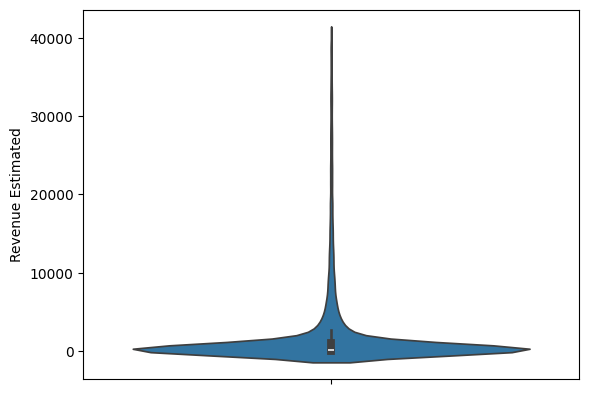

In [7]:
indies = df_rev[df_rev['is_aaa'] == 0]
indies = indies[indies['Revenue Estimated'] < 40000]
g = sns.violinplot(data=indies, y='Revenue Estimated')

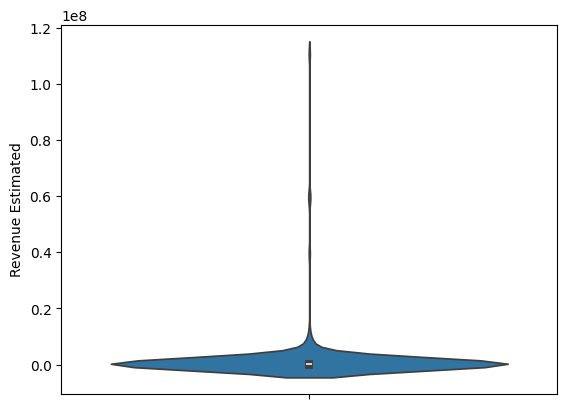

In [8]:
aaa = df_rev[df_rev['is_aaa'] == 1]
h = sns.violinplot(data=aaa, y='Revenue Estimated')

The idea is to show that the majority of games do not perform exceptionally well (illustrated by the widest part of the graph sitting around the 0 mark). \
This visualisation does not explicitly show the fact that a AAA game which did 'not perform exceptionally well' makes significantly more money than an indie one.

In [9]:
df1 = pd.read_csv("DATASETS/result.csv")[["metascore", "name"]]
df2 = pd.read_csv("DATASETS/steam_reviews_revenue.csv")[["name", "Launch Price", "is_aaa"]]

df = pd.merge(df1, df2, how="inner", on="name")
df = df.groupby(df["name"]).aggregate({"name":"first", "Launch Price":"mean", "metascore":"mean", "is_aaa":"first"})

df["is_aaa"] = df["is_aaa"].replace({0:"Indie", 1:"Triple A"})

fig = px.scatter(df, x='Launch Price', y='metascore', trendline='ols', title='Analysis of price and metascore', color="is_aaa", labels={'is_aaa':''})
fig.update_layout(xaxis=dict(range=[2.9, 20.1]))
fig.update_traces(selector=dict(type='trendline'), name='Trendline')
fig.show()

Metascore is a score given to a video game based on reviews. The score ranges from 0 to 100 with 100 being the highest. We set the price range from 0 to 20 since there are not a lot of data points above 20, so the weight is more evenly spread. The line fitting the model has a slight incline of about 0.16. The line is almost flat, so price is not relevant for the metascore. One thing you can notice is that triple A games are better rated overall. Most of the triple A games are above the line while the other video games are more evenly ditributed or even more on the lower side. Altough price may not be of an influence on the metascore, tiple A does say something about the metascore 

### `Sources`

1. Arora, K. (2023, November 23). The gaming industry: a behemoth with unprecedented global reach. Forbes. https://www.forbes.com/sites/forbesagencycouncil/2023/11/17/the-gaming-industry-a-behemoth-with-unprecedented-global-reach/#:~:text=In%202022%2C%20the%20global%20gaming%20industry%20generated%20an%20estimated%20%24184.4%20billion.&text=In%202022%2C%20the%20global%20recorded%20music%20industry%20generated%20%2426.2%20billion.&text=In%202022%2C%20the%20global%20movie,I%20find%20this%20mind%2Dblowing.

### `Overzicht`

Perspective 1: it is better to release your game through a AAA publisher. \
\
Argument 1.1: AAA games are generally more popular (higher player count). [Number of players] \
Argument 1.2: AAA games achieve a higher revenue, no matter how well the game is received. [Mean estimated revenue for AAA and indie games] \
\
Perspective 2: it is better to publish the game on your own (indie). \
\
Argument 2.1: Indie games almost always have a lower development cost: this is because the teams and marketing budgets are smaller, compared to those of large publishers. This results in a lower game price, making it more accessible. [Cost of indie games & Cost of AAA games]
